# Online Food Dataset Analysis & Customers' Behavior Prediction

**Author:** Hai Hung Nguyen

**Date:** March 10, 2024

**Libraries and Dependencies:**
- pandas
- matplotlib
- numpy
- seaborn
- scikit-learn
- imbalanced-learn

**Sources:** This project is based on data *released under MIT License*: https://www.mit.edu/~amini/LICENSE.md

**Domain:** Demographics, Customer behaviour

**Task:** Exploratory Data Analysis, Data Cleaning, Feature Engineering, Model Training & Verification.

# A. Introduction

<div style="max-width:1000px;margin-left: auto; margin-right: auto;">
    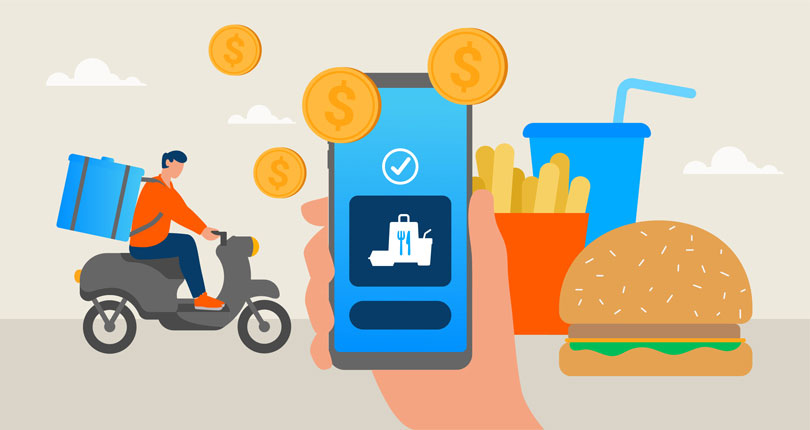
</div>


In today's dynamic economy, e-commerce has evolved into an indispensable element, with an increasing number of consumers opting for the convenience of purchasing products and services from the comfort of their homes. This shift has resulted in a notable surge in online orders, presenting businesses, or particularly those in the Food & Beverage (F&B) sector such as restaurants, with the challenge of adapting to this evolving landscape while ensuring a seamless and satisfactory customer experience.

This project aims to explore the potential of data analysis in the context of online food ordering, offering insights into customer behavior. By leveraging data analysis and data science techniques, we seek to provide businesses with valuable information to optimize their strategies and enhance the customer purchasing journey.

The structure of this report is as follows: We will begin by examining the dataset to understand its contents. Next, we will analyze customer profiles, identifying trends and preferences. Following this, we will address any technical considerations related to the dataset and its processing. We will then apply data science techniques to develop some simple predictive models for customer behavior. Finally, we will discuss the findings and their implications for businesses in the online ordering space.

# B. Dataset Analysis

## 1. Data Description
### 1.1. Data & Packages Loading

In [821]:
# Packages importing: 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import folium

import warnings
warnings.filterwarnings('ignore')

# DataFrame data:
data_path = 'onlinefood/onlinefoods.csv'
data = pd.read_csv(data_path)

### 1.2. Data Understanding

In [822]:
# Summary statistics from the DataFrame data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [823]:
data.head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


The 'data' DataFrame contains a total of 388 observations and consist of 12 variables, all of which are **non-null**:. 

- 5 of them are numerical: 'age', 'family size', 'latitude', 'longitude', and 'pincode'.
- 3 of them are binary: 'gender', 'output' and 'feedback'.
- 4 of them are categorical: 'marital status', 'occupation', 'monthly income', and 'educational qualifications'.

**'age':** The age of the observation. E.g. 17, 50

**'gender':** The gender of the observation. E.g. 'male', 'female'

**'marital status':** The marital status of the observation. E.g. 'married', 'single'

**'occupation':** Job that the observation is engaged in. E.g. 'student'

**'monthly income':** The monthly income of the observation. E.g. 'no income', 'below rs.10000'

**'educational qualifications':** The highest level of education completed by the observation. E.g. 'post graduate', 'graduate'

**'family size':** The number of individuals in the observation's family. E.g. 3, 4

**'latitude':** The latitude of the observation's location.

**'longitude':** The longitude of the observation's location.

**'pin code':** The pincode of the observation's location.

**'output':** ordering_food_again?. E.g. Yes, No

**'feedback':** The feedback provided by the observation after receiving the order. E.g. Positive, Negative


In this analysis, we designate **'output'** (indicating whether the customer orders food again) as our target variables, while the remaining attributes serve as **feature**. This approach allows us to develop predictive models in the subsequent phase, aimed at determining whether a customer is likely to reorder and which ones are inclined to provide positive feedback.


## 2. Exploratory Data Analysis
This section focuses on observing the distribution of each feature and how they associate with the target variables 'output' and 'feedback'.


### 2.1. Who are our customers?

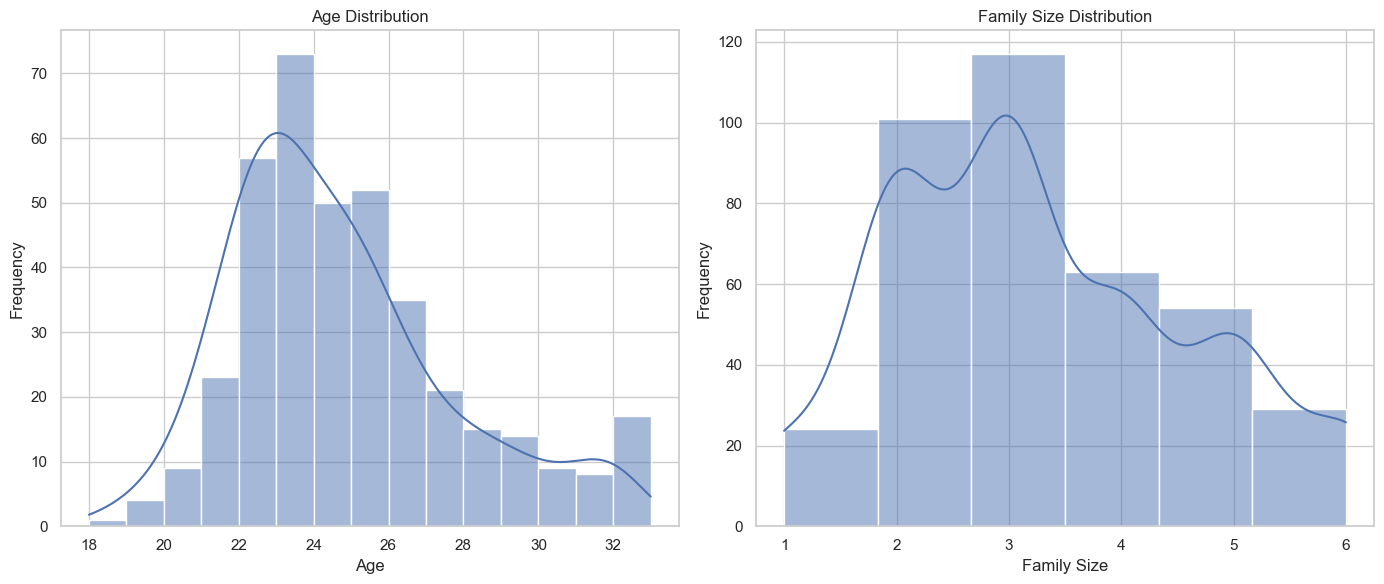

In [824]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Age distribution plotting
sns.histplot(data['Age'], bins=15, kde=True, ax=ax[0], palette=sns.color_palette('pastel'))
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# Family size distribution plotting
sns.histplot(data['Family size'], bins=6, kde=True, ax=ax[1], palette=sns.color_palette('pastel'))
ax[1].set_title('Family Size Distribution')
ax[1].set_xlabel('Family Size')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The age range of our customers spans from 18 to 32 years old. The distribution of ages has a bell shape with right skewness, indicating that the majority of our customer base is younger than the average age. Specifically, most customers fall within the age range of 22 to 25 years old.

As for family size distribution, the majority of customers using our service have households consisting of 2 to 3 people.

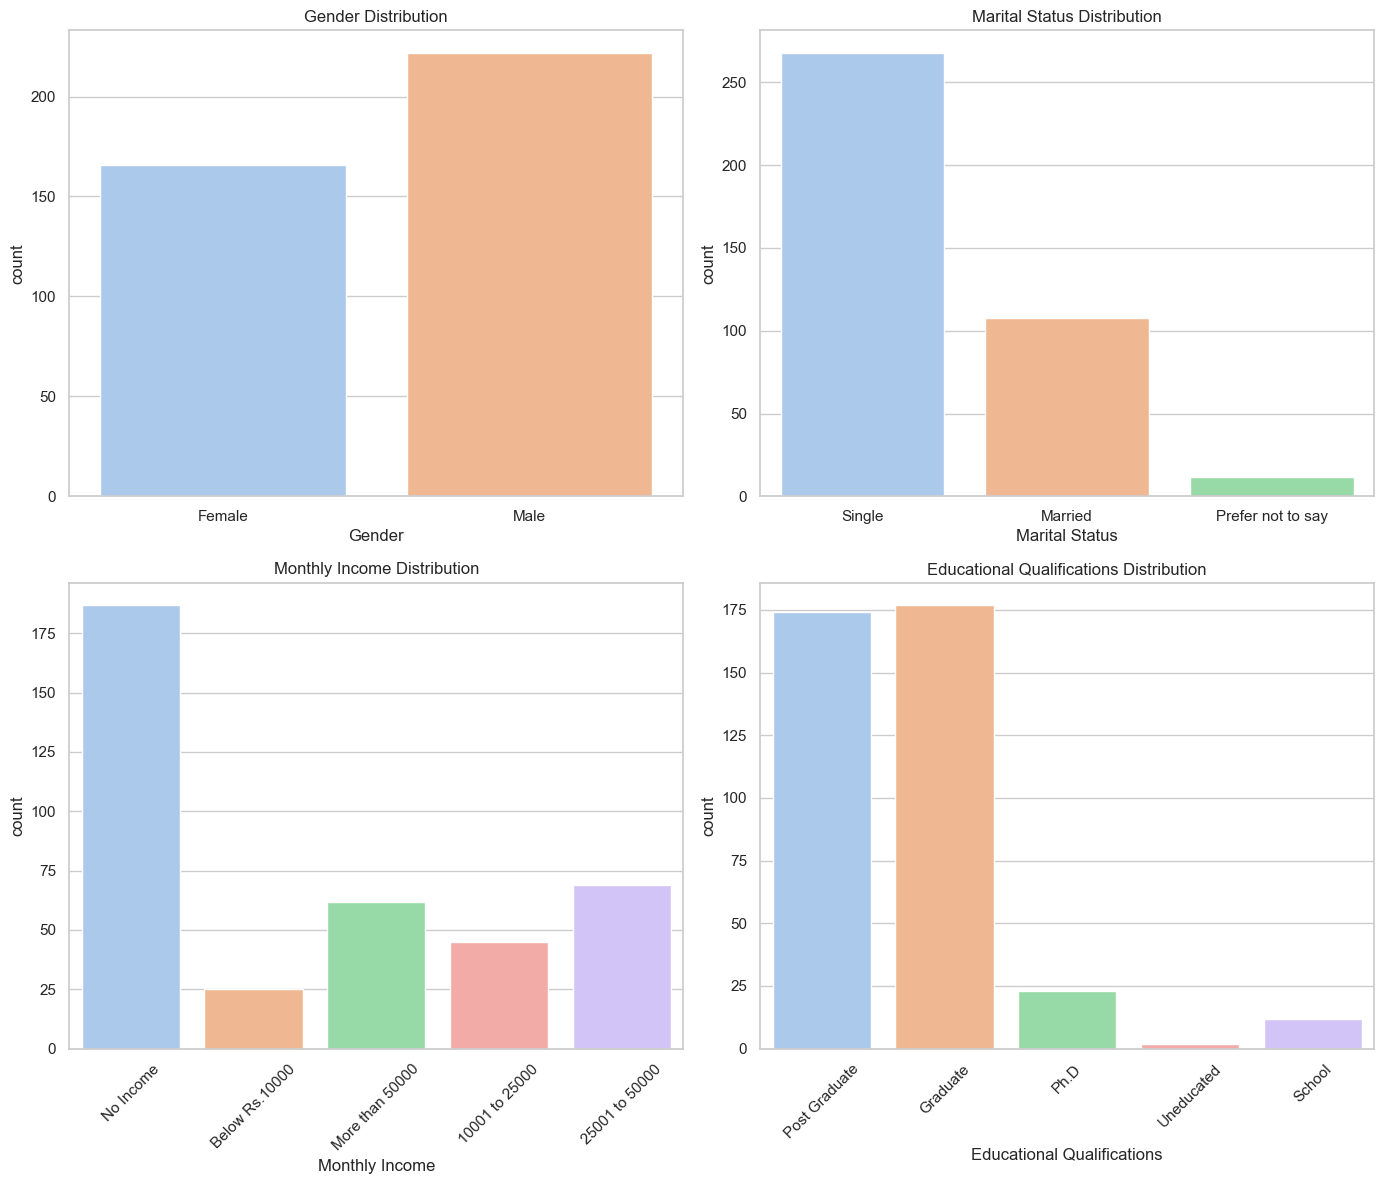

In [825]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Gender distribution plotting
sns.countplot(x='Gender', data=data, ax=axes[0, 0], palette=sns.color_palette('pastel'))
axes[0, 0].set_title('Gender Distribution')

# Marital status distribution plotting
sns.countplot(x='Marital Status', data=data, ax=axes[0, 1], palette=sns.color_palette('pastel'))
axes[0, 1].set_title('Marital Status Distribution')

# Monthly income distribution plotting
sns.countplot(x='Monthly Income', data=data, ax=axes[1, 0], palette=sns.color_palette('pastel'))
axes[1, 0].set_title('Monthly Income Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Educational qualifications distribution plotting
sns.countplot(x='Educational Qualifications', data=data, ax=axes[1, 1], palette=sns.color_palette('pastel'))
axes[1, 1].set_title('Educational Qualifications Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Among the customers in our dataset, there are more males than females, although the difference is not significant enough to create an imbalance.

In terms of marital status, the majority of customers are single, with approximately one-third being married. Only a small fraction of customers did not provide their marital status.

Moving on to monthly income, it's worth noting that the largest segment of our customers falls into the category of no income. Within the remaining income groups, the customer count tends to increase gradually with higher monthly income levels. However, further investigation is needed to establish the relationship between monthly income and customers' ordering behavior.

Regarding educational level, a significant portion of our customers have attained either a graduate or postgraduate degree. This suggests that our service is appealing to individuals with higher levels of education."

In [826]:
# Location distribution plotting
map = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=12)
for lat, lon in zip( data['latitude'], data['longitude']):
    folium.Marker([lat, lon]).add_to(map)

map.save("map.html")
map

Utilizing latitude and longitude data, restaurants can pinpoint the areas where their customers are concentrated, enabling them to optimize advertising activities and delivery services. 

However, upon analysis of this dataset, it's evident that customer orders are not heavily concentrated in specific areas but rather evenly distributed throughout the city center. There are scattered orders on the outskirts of the city as well. 

While this distribution may not offer significant insights, it does provide a general overview of the geographic distribution of our customer base.

### 2.2. How do the distributions of features vary based on online ordering behavior?
In this section, we'll examine how the features are distributed based on the target condition.

#### 2.2.1. 'Age' - Which group of ages will order again?

<Figure size 1400x700 with 0 Axes>

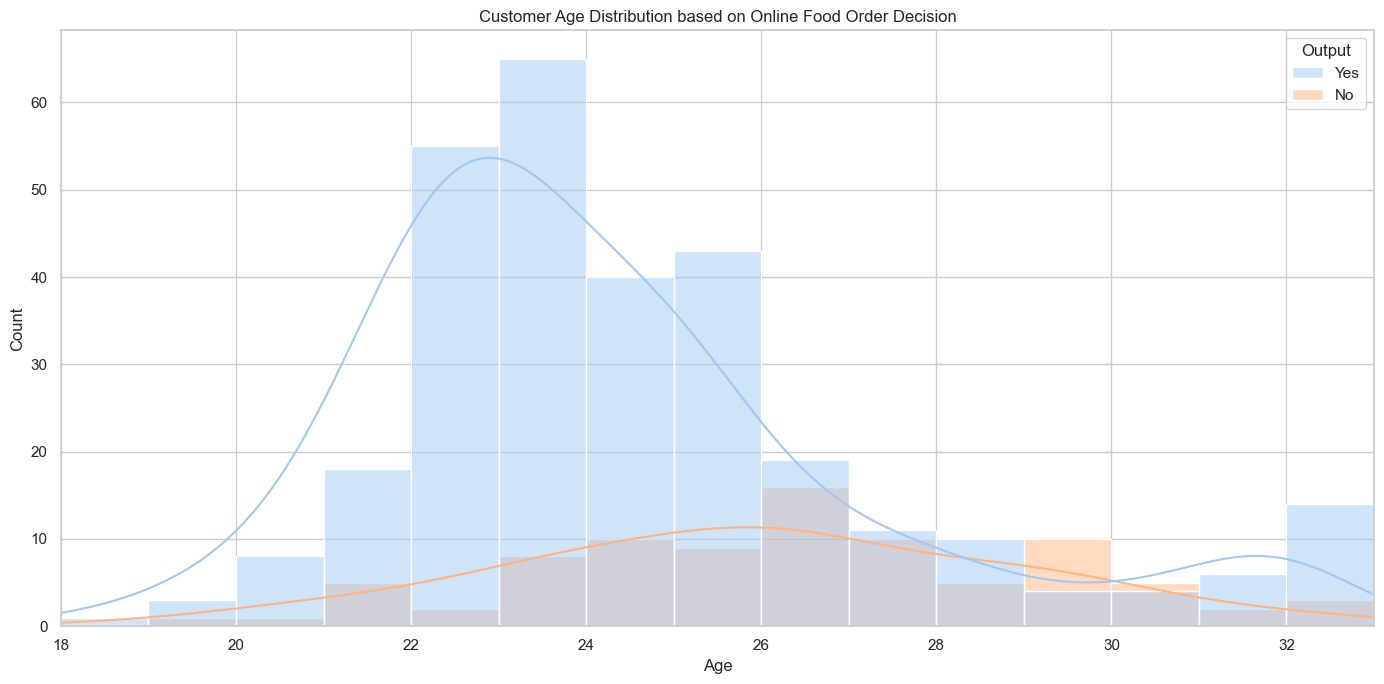

In [827]:
# The age distribution + ordering behavior plotting
plt.figure()
sns.set_style("whitegrid")
plt.subplots(figsize=(14, 7))

sns.histplot(x=data['Age'], bins=15, hue=data['Output'], kde=True, palette=sns.color_palette('pastel'))
plt.xlim(data['Age'].min(), data['Age'].max())
plt.title("Customer Age Distribution based on Online Food Order Decision")
plt.xlabel("Age")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

The majority of customers opt to reuse the service, while a small portion choose not to continue.

Customers who are likely to reuse the service predominantly fall within the age range of 22 to 25 years old.

Conversely, those who opt not to continue using the service tend to be older, with a concentration between 24 and 28 years old.

#### 2.2.2. 'Gender' - Who orders food more: male or female?

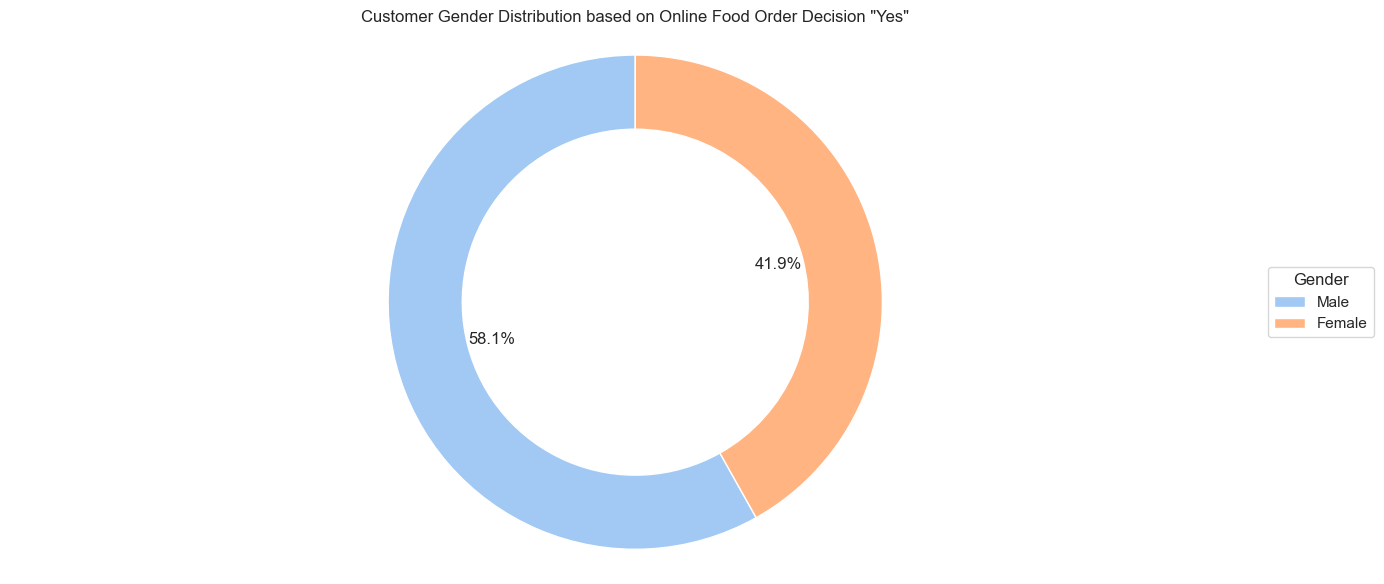

In [828]:
# Dataset filtering by Output 'Yes'
filtered_data = data[data['Output'] == 'Yes']

# The customers counting by Output
gender_counts = filtered_data['Gender'].value_counts()

# Gender distribution plotting
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

plt.pie(gender_counts, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Customer Gender Distribution based on Online Food Order Decision "Yes"')
plt.axis('equal')
plt.legend(labels=gender_counts.index, title='Gender', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

Among the customers who decide to use the service again, there are more male customers than female customers, but the difference is not significant.

#### 2.2.3. 'Marital Status' - Who orders food more: married or single?

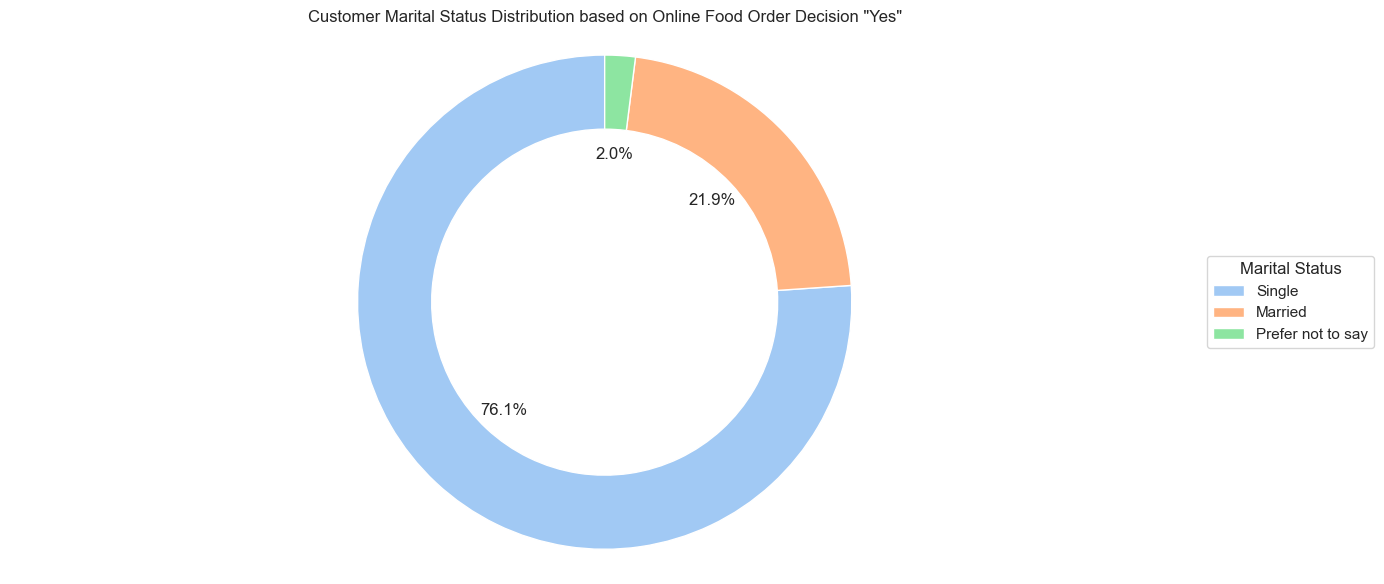

In [829]:
# Dataset filtering by Output 'Yes'
filtered_data = data[data['Output'] == 'Yes']

# The customers counting by Output
marital_counts = filtered_data['Marital Status'].value_counts()

# Marital status distribution plotting
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

plt.pie(marital_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Customer Marital Status Distribution based on Online Food Order Decision "Yes"')
plt.axis('equal')
plt.legend(labels=marital_counts.index, title='Marital Status', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

Three-quarters of customers who choose to continue using the service are single. The remaining portion is comprised of married individuals, with only a very small fraction opting not to disclose their marital status.

#### 2.2.4. 'Monthly Income' - Does it influenced the food ordering behaviour?

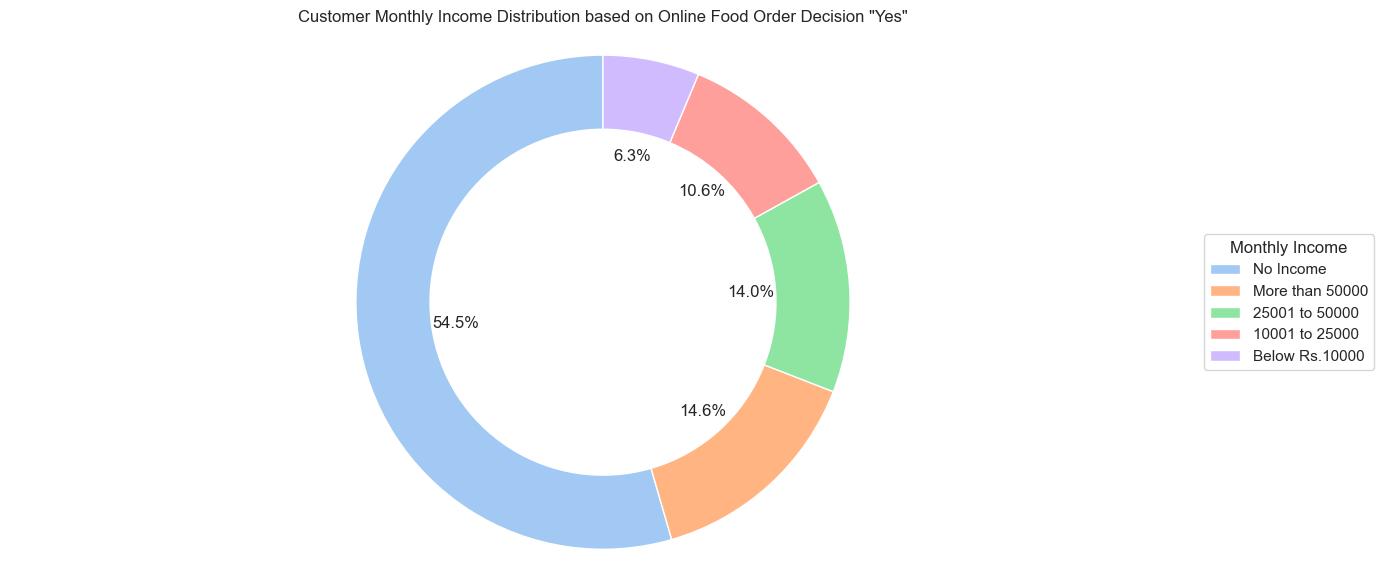

In [830]:
# Dataset filtering by Output 'Yes'
filtered_data = data[data['Output'] == 'Yes']

# The customers counting by Output
income_counts = filtered_data['Monthly Income'].value_counts()

# Monthly Income Distribution Plotting
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
plt.pie(income_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Customer Monthly Income Distribution based on Online Food Order Decision "Yes"')
plt.axis('equal')
plt.legend(labels=income_counts.index, title='Monthly Income', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

Within the group of customers who opt to continue using the service, over half belong to the category of no income. The remaining portion is evenly distributed among other income groups, with the under Rs. 10,000 income bracket representing the smallest proportion.

#### 2.2.5. 'Education Qualification'

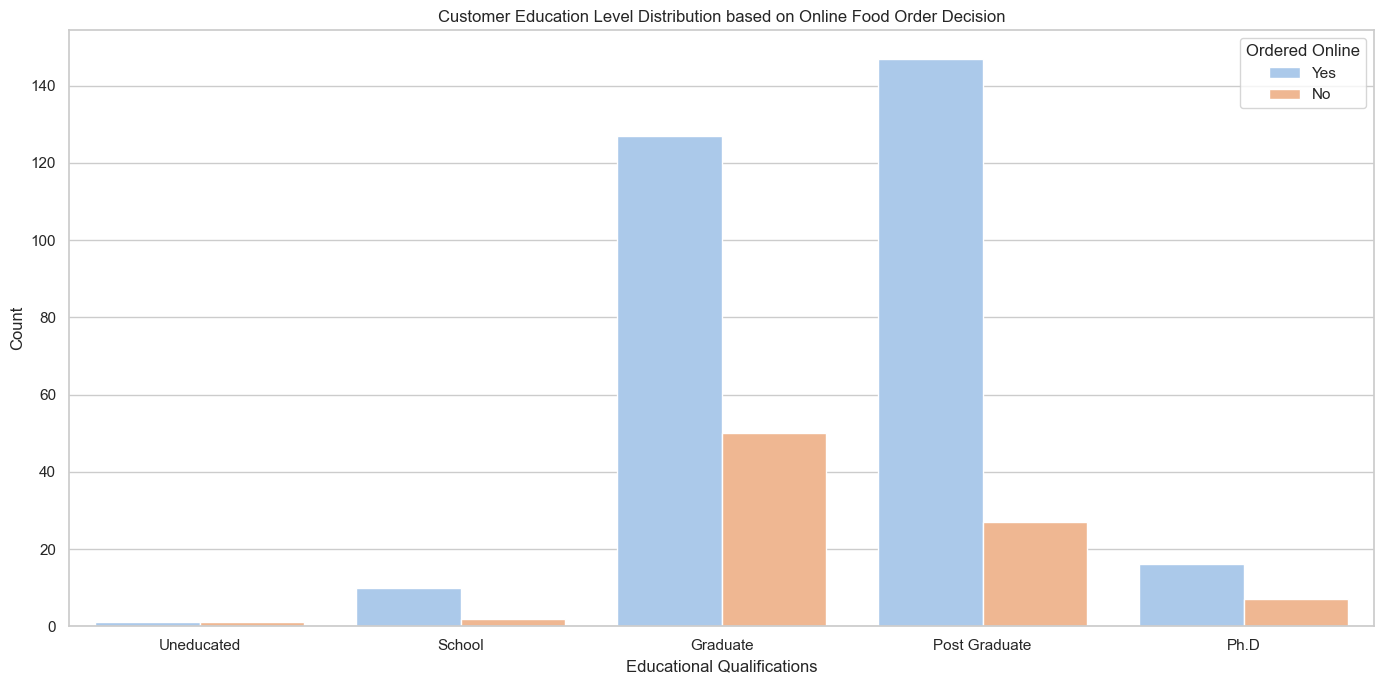

In [831]:
# Ordinal sorting
edu_order = ["Uneducated", "School", "Graduate", "Post Graduate", "Ph.D"]

# Educational distribution plotting
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

sns.countplot(x='Educational Qualifications', hue='Output', data=data, order=edu_order, palette=sns.color_palette('pastel'))
plt.title('Customer Education Level Distribution based on Online Food Order Decision')
plt.xlabel('Educational Qualifications')
plt.ylabel('Count')
plt.legend(title='Ordered Online', loc='upper right')

plt.tight_layout()
plt.show()

From this plot, it's evident that the Post Graduate group exhibits the highest satisfaction rate with the service and has the highest likelihood of reordering, followed by the Graduate and Ph.D. groups. 

However, within the Graduate and Ph.D. groups, there is a relatively high rate of customers opting not to continue ordering. 

Therefore, the company may need to adjust its strategy to better retain these customer segments.

#### 2.2.6. 'Feedback'

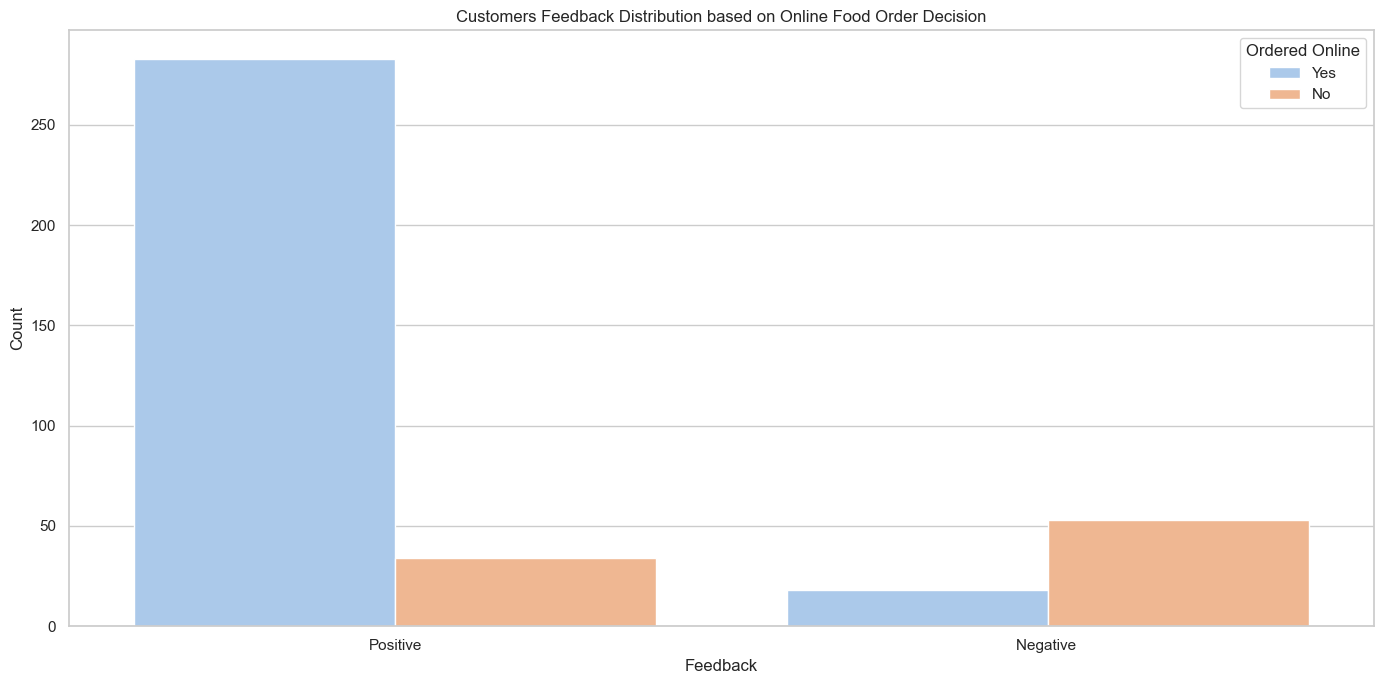

In [832]:
# Feedback distribution plotting
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

sns.countplot(x='Feedback', hue='Output', data=data, palette=sns.color_palette('pastel'))
plt.title('Customers Feedback Distribution based on Online Food Order Decision')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.legend(title='Ordered Online', loc='upper right')

plt.tight_layout()
plt.show()

The relationship between this feature and the target is relatively straightforward. Among customers who provide positive reviews for the restaurant, nearly all are inclined to reorder. Conversely, among customers who provide negative reviews, it is highly probable that they will not reorder.

## 3. Data Processing
### 3.1. Data Cleaning

In [833]:
# Unique checking:
for x in data:
    unique_values = data[x].unique()
    print(f'Unique values of "{x}": "{unique_values}"')

# Space striping:
data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

Unique values of "Age": "[20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]"
Unique values of "Gender": "['Female' 'Male']"
Unique values of "Marital Status": "['Single' 'Married' 'Prefer not to say']"
Unique values of "Occupation": "['Student' 'Employee' 'Self Employeed' 'House wife']"
Unique values of "Monthly Income": "['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']"
Unique values of "Educational Qualifications": "['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']"
Unique values of "Family size": "[4 3 6 2 5 1]"
Unique values of "latitude": "[12.9766 12.977  12.9551 12.9473 12.985  12.9299 12.9828 12.9854 12.8988
 12.9438 12.8893 12.9783 12.982  13.0298 12.9983 12.9925 12.9306 12.9353
 12.9155 13.0019 12.9698 12.9261 12.9119 12.9662 12.9565 13.0206 12.9635
 13.0067 12.8845 13.0158 12.9343 13.0012 12.9442 13.0487 12.9889 12.9335
 13.102  12.9048 12.9337 12.9037 13.0289 12.9561 12.9579 13.014  13.0138
 12.9537 12.998  13.0496 13.0166 13.0503 1

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


After reviewing the unique values, it's apparent that some feature values require editing. For instance, the 'Negative' value within the 'Feedback' feature.

### 3.2. Missing Data Processing

In [834]:
#Check NA/Missing Values in form of '?':
missing_values = (data == np.nan).sum()
print(missing_values)

data.replace(np.nan).dropna(inplace=True)

print(data.shape[0])

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64
388


## 4. Feature Engineering

### 4.1. Feature Elimination
In this step we will drop some features that are not important to the target.

In [835]:
# Drop 'fnlwgt', 'education_num', 'race', 'native_country' on train set --> train_1
data.drop(['latitude','longitude','Pin code','Unnamed: 12'], axis=1, inplace=True)

### 4.2. Label Encoding


In [836]:
from sklearn.preprocessing import LabelEncoder

feature_1 = ['Gender', 'Output', 'Feedback']

for feature in feature_1:
    data[feature] = LabelEncoder().fit_transform(data[feature])

### 4.3. One-hot Encoding

In [837]:
# One-hot encode 'workclass', 'education', 'marital-status', 'occupation' and, 'relationship'.
data = pd.get_dummies(data, columns=['Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications'], drop_first=False)

In [838]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Age                                       388 non-null    int64
 1   Gender                                    388 non-null    int32
 2   Family size                               388 non-null    int64
 3   Output                                    388 non-null    int32
 4   Feedback                                  388 non-null    int32
 5   Marital Status_Married                    388 non-null    bool 
 6   Marital Status_Prefer not to say          388 non-null    bool 
 7   Marital Status_Single                     388 non-null    bool 
 8   Occupation_Employee                       388 non-null    bool 
 9   Occupation_House wife                     388 non-null    bool 
 10  Occupation_Self Employeed                 388 non-null    bool

## 5. Model Training & Verification 
In this section, we will utilize fundamental Data Science techniques to construct a predictive model aimed at determining whether a customer will place an order again.

### 5.1. Logistic Regression Model & Evaluation
#### 5.1.1. Preparing

In [839]:
#Feature selecting
X = data.drop('Output',axis=1)
y = data['Output']

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### 5.1.2. Implementation & Evaluation

In [840]:
#Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

#Predictions on the validation set
target_pred = logistic_model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, target_pred)

print(f"The accuracy is: {accuracy}")

The accuracy is: 0.8632478632478633


The model demonstrates a relatively high accuracy of approximately 86.32%, indicating that it correctly predicts the class labels for about 86.32% of the total samples from the test set. This reflects overall good performance.

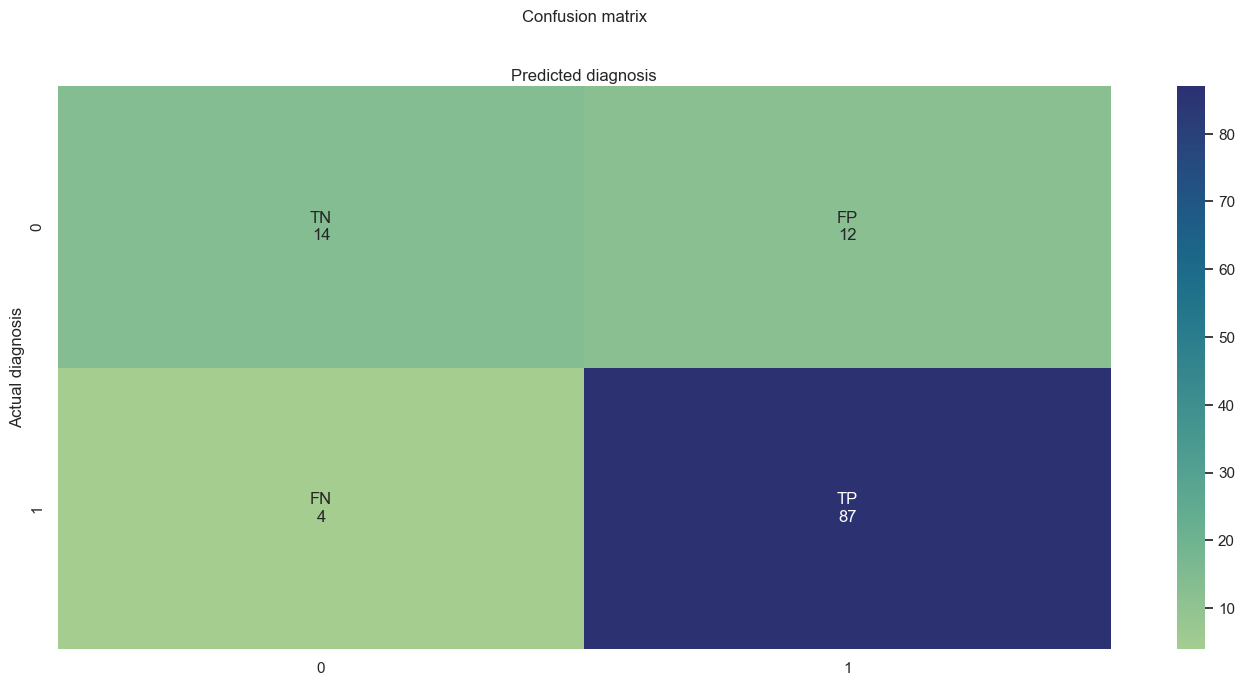

In [841]:
# Visualizing the Confusion Matrix
class_names = [0,1]

fig, ax = plt.subplots()

conf_matrix = confusion_matrix(y_test, target_pred)

group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in
conf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot=labels, cmap=sns.color_palette("crest", as_cmap=True) ,fmt='')
ax.xaxis.set_label_position("top")

plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

plt.tight_layout()

Examining the confusion matrix reveals that out of 117 samples:
   - True Positive (TP): 87 samples were correctly classified as positive (1).
   - True Negative (TN): 14 samples were correctly classified as negative (0).
   - False Positive (FP): 12 samples were incorrectly classified as positive (1) when they were actually negative (0).
   - False Negative (FN): 4 samples were incorrectly classified as negative (0) when they were actually positive (1).

The model misclassified only some samples, particularly in false positives and false negatives.

In a business context, among the 117 customers:
   - TP: 87 customers were predicted to reorder, and they actually did reorder.
   - TN: 14 customers were predicted not to reorder, and they indeed did not reorder.
   - FP: 12 customers were predicted to reorder, but they did not reorder.
   - FN: 4 customers  were predicted not to reorder, but they did reorder.

              precision    recall  f1-score   support

           0       0.78      0.54      0.64        26
           1       0.88      0.96      0.92        91

    accuracy                           0.86       117
   macro avg       0.83      0.75      0.78       117
weighted avg       0.86      0.86      0.85       117

Thresholds of ROC curve are [       inf 0.96728956 0.95658773 0.95573687 0.94728175 0.94677257
 0.94111131 0.94025774 0.93892082 0.93333986 0.93184218 0.9261202
 0.92329381 0.91768811 0.91716997 0.91691817 0.91561469 0.89337382
 0.88777763 0.86952434 0.86580015 0.85158684 0.83131845 0.81911207
 0.81895842 0.80663544 0.80359792 0.80344947 0.80058573 0.79645432
 0.78955721 0.78183465 0.77854488 0.76574717 0.76250346 0.75755372
 0.747916   0.74789875 0.71323618 0.54488202 0.39131416 0.35855656
 0.23796513 0.2243505  0.14511907]


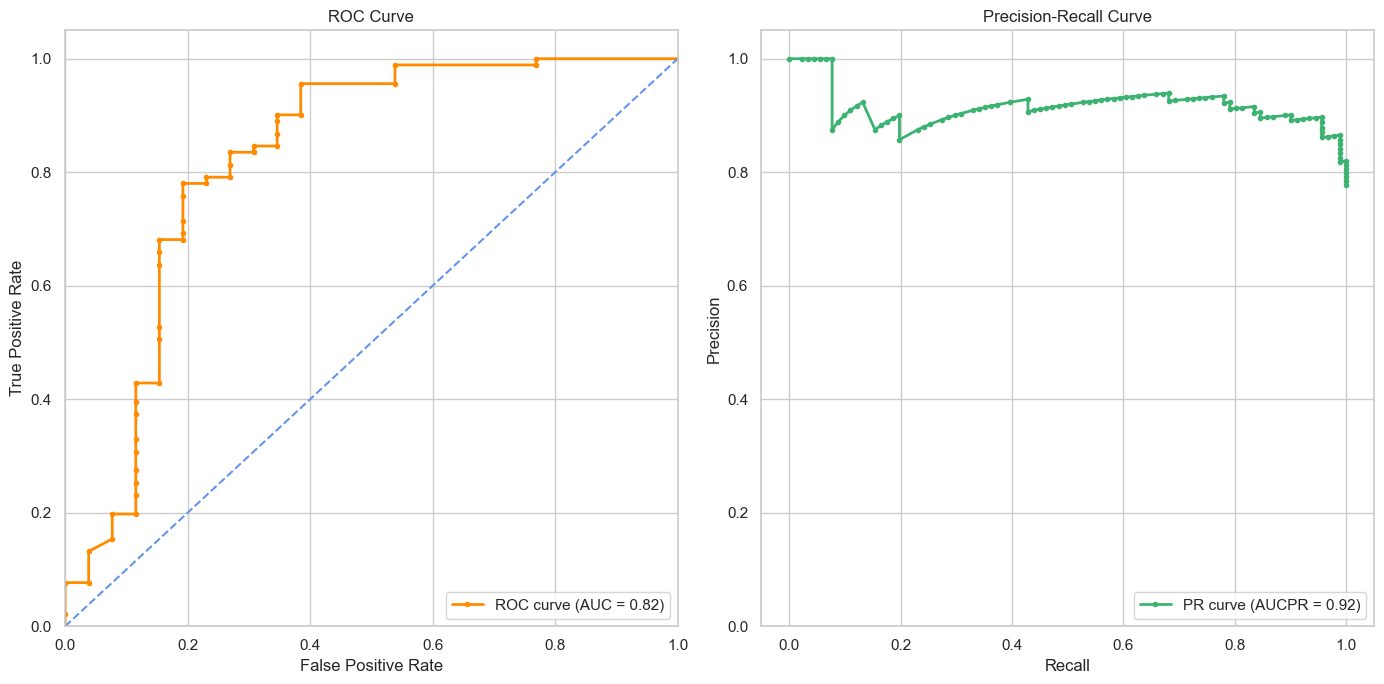

In [842]:
# Classification report
class_report = classification_report(y_test, target_pred)
print(class_report)

# Calculate predicted probabilities for the positive class
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"Thresholds of ROC curve are {thresholds}")

sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, marker='.', color="darkorange", lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='cornflowerblue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='.', color="mediumseagreen", lw=2, label='PR curve (AUCPR = %0.2f)' % pr_auc)
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

The classification report highlights higher precision, recall, and F1-score for class 1 (positive) compared to class 0 (negative), indicating the model's strength in predicting the positive class but struggles more with predicting the negative class. The observed support index for each class (Class 0: 26 vs. Class 1: 91) further indicates an imbalance in the dataset.

While the ROC curve provides insights into classifier performance across different threshold values, its interpretation may be misleading in cases where one class is significantly more prevalent than the other. In such instances, the ROC curve can give an overly optimistic assessment of the model’s performance. Therefore, it's beneficial to complement the ROC curve with the Precision-Recall (PR) curve for a more comprehensive evaluation. Overall, the model demonstrates relatively good performance.

#### 5.1.3. Threshold tuning
As mentioned in the above sections, the dataset exhibits class imbalance, which can significantly influence the predictive performance of the model. To address this issue, threshold tuning used as a common technique for determine an optimal threshold for imbalanced classification. The goal is to maximize the true positive rate while minimizing the false positive rate, i.e. the optimal threshold should be the point closest to the upper-left side of the ROC curve. 

The optimal threshold: 0.7478987485071622
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        26
           1       0.90      0.90      0.90        91

    accuracy                           0.85       117
   macro avg       0.78      0.78      0.78       117
weighted avg       0.85      0.85      0.85       117



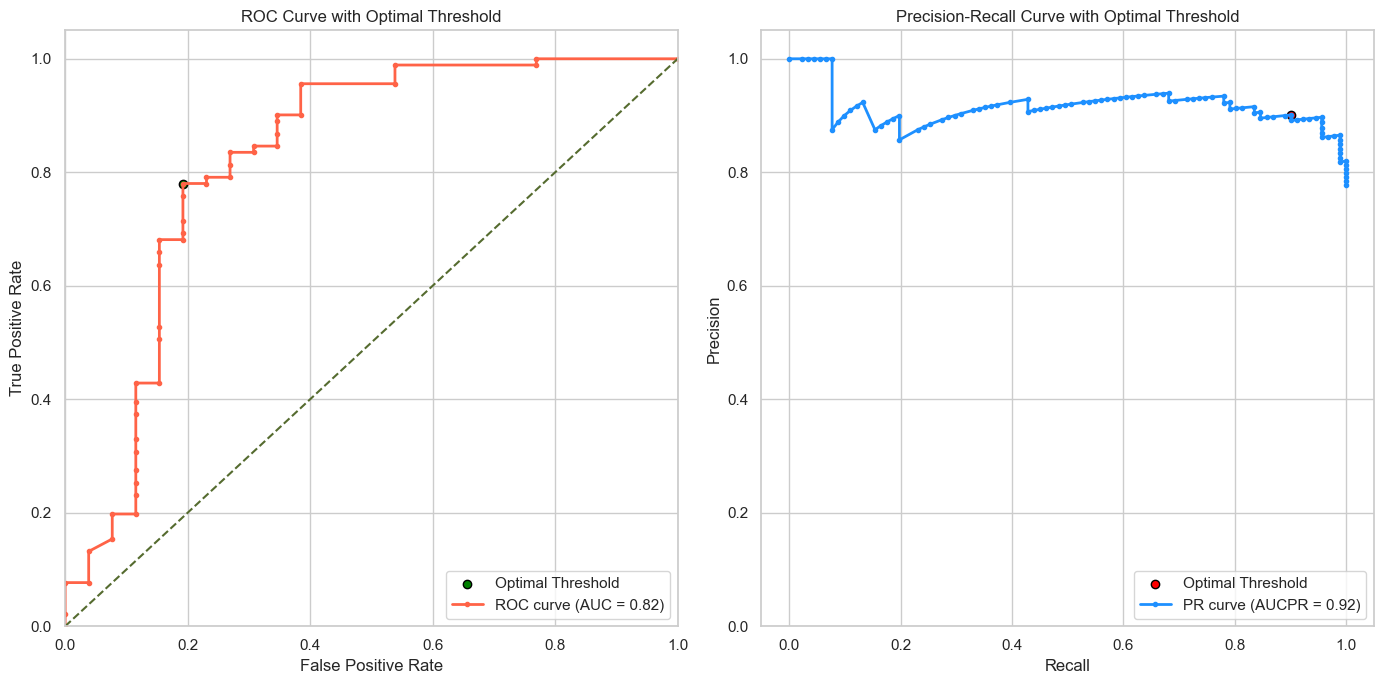

In [843]:
# Calculate predicted probabilities for the positive class
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Threshold choosing
idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[idx]
print(f"The optimal threshold: {optimal_threshold}")

y_lab = y_probs.copy()
y_lab[y_lab >= optimal_threshold] = 1
y_lab[y_lab < optimal_threshold] = 0

# Classification report
class_report = classification_report(y_test, y_lab)
print(class_report)

# ROC Curve
fpr, tpr, optimal_threshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(fpr[idx], tpr[idx], c='green', marker='o', label='Optimal Threshold', edgecolors='black')
plt.plot(fpr, tpr, marker='.', color="tomato", lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkolivegreen', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend(loc="lower right")

# Precision-Recall Curve
precision, recall, optimal_threshold = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.scatter(recall[idx], precision[idx], c='red', marker='o', label='Optimal Threshold', edgecolors='black')
plt.plot(recall, precision, marker='.', color="dodgerblue", lw=2, label='PR curve (AUCPR = %0.2f)' % pr_auc)
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Optimal Threshold')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

With the selection of the optimal threshold point, there has been a shift in the prediction of classes, notably affecting the trade-off between precision and recall. The precision for class 0 decreased from 0.78 to 0.65, indicating a reduction in the model's ability to accurately identify customers likely to reorder (TP). Consequently, this led to an increase in false positives (FP), where the model incorrectly predicted that customers would reorder when they did not. 

Conversely, there was an increase in recall from 0.54 to 0.65. This signifies that the model successfully identified more customers who actually reordered (TP), thereby reducing the number of false negatives (FN), where the model incorrectly predicted that customers would not reorder when they actually did. 

Determining whether this trade-off is good or bad depends on the business's goal. Minimizing false positives helps businesses avoid misallocating resources in unnecessary marketing expenses or efforts directed towards customers unlikely to convert. Meanwhile, minimizing false negatives helps businesses avoid missing opportunities to retain customers who had the potential to reorder, leading to revenue gains and opportunities for customer engagement and loyalty-building activities. The decision of which case carries a higher opportunity cost hinges on each business's individual assessment.

Therefore, depending on the specific circumstances and business objectives, businesses choose to prioritize increasing precision or recall.

### 5.2. Random Forest Classifier
When it comes to building predictive models, various methods exist, each with its own characteristics and algorithms that offer distinct advantages in different scenarios. Among these models, Random Forest stands out for its ability to effectively handle imbalanced datasets.

#### 5.2.1. Implementation & Evaluation

In [844]:
# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
rfm_target_pred = random_forest_model.predict(X_test)

# Get feature importances from the Random Forest model
feature_importances_rf = random_forest_model.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importances
feature_importance_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
})

# Sort the DataFrame by the importances
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

[[19  7]
 [ 2 89]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.93      0.98      0.95        91

    accuracy                           0.92       117
   macro avg       0.92      0.85      0.88       117
weighted avg       0.92      0.92      0.92       117



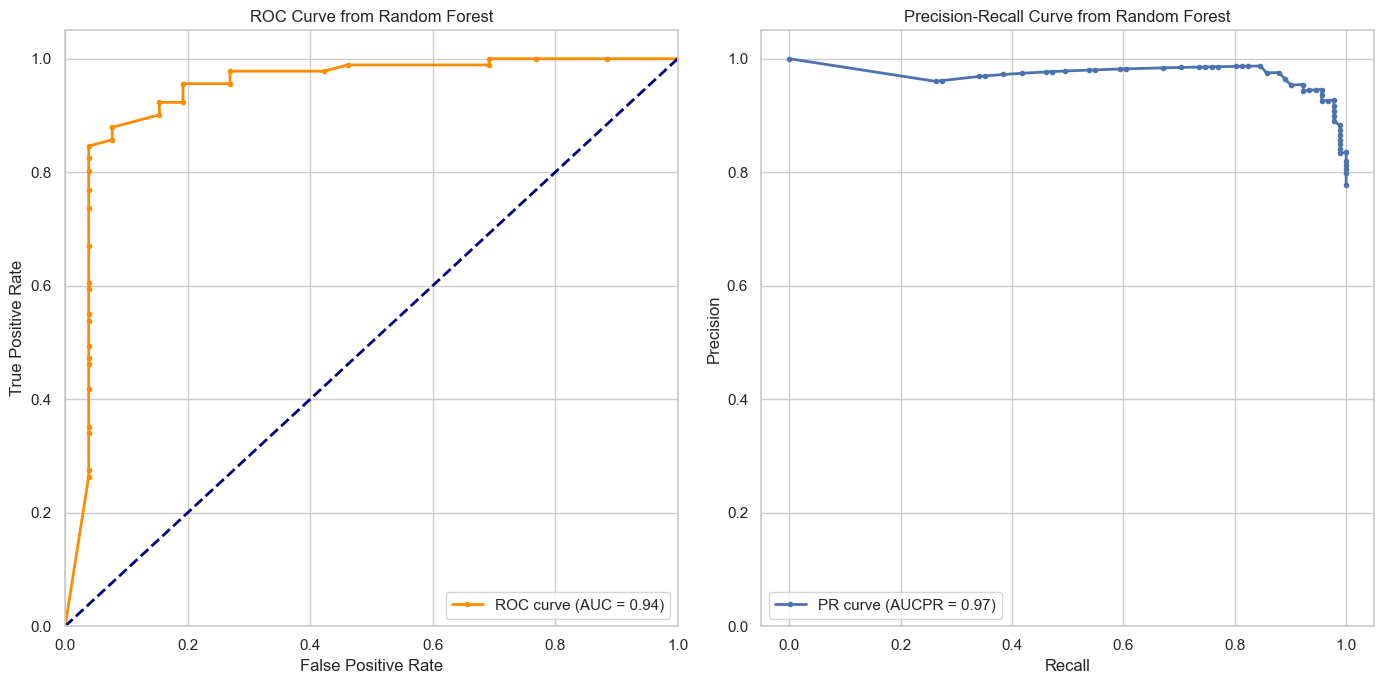

In [960]:
# Get predicted probabilities for the positive class
rfm_probs = random_forest_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rfm_probs)
pr_auc_rf = auc(recall_rf, precision_rf)

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rfm_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, marker='.', color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve from Random Forest')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall_rf, precision_rf, marker='.', lw=2, label='PR curve (AUCPR = %0.2f)' % pr_auc_rf)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve from Random Forest')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

In [961]:
print(confusion_matrix(y_test, rfm_target_pred))
print(classification_report(y_test, rfm_target_pred))

[[19  7]
 [ 2 89]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.93      0.98      0.95        91

    accuracy                           0.92       117
   macro avg       0.92      0.85      0.88       117
weighted avg       0.92      0.92      0.92       117



In summary, this model exhibits strong performance, especially in cases where the prediction accuracy belongs to class 1 (positive class), as indicated by high precision, recall, and F1 score for class 1. Although the performance for class 0 (negative class) is slightly lower than class 1, but still achieves a relatively high level.

#### 5.2.2. Feature Importances

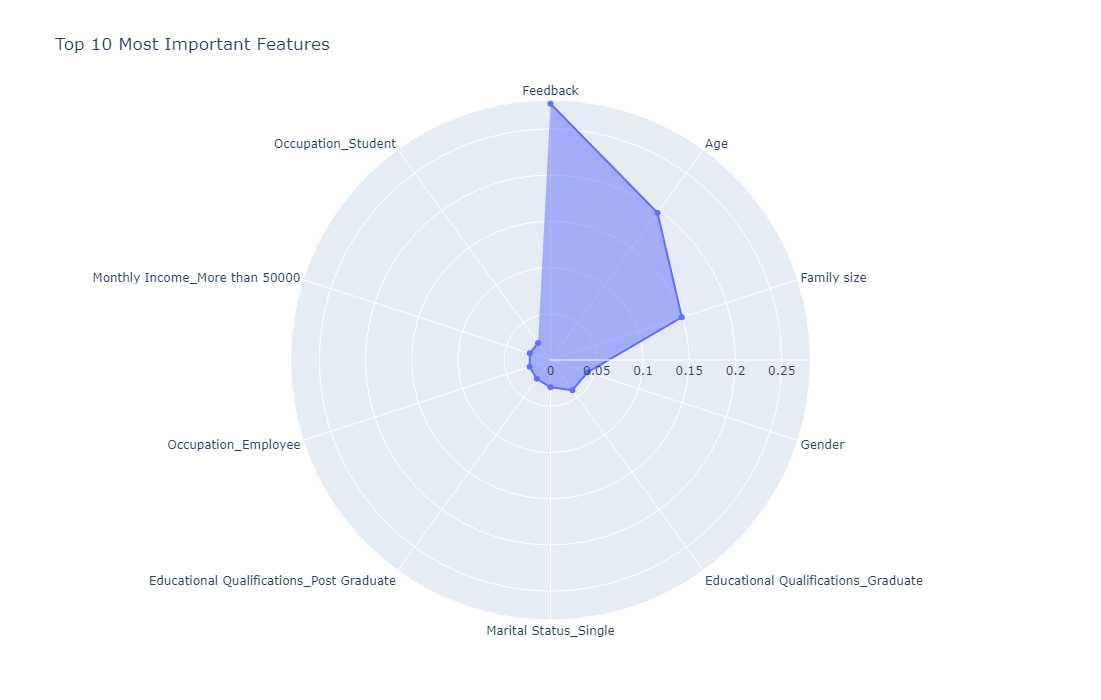

In [954]:
import plotly.graph_objects as go

fig = go.Figure(data = go.Scatterpolar(r = list(x for x in feature_importance_rf_df.Importance.head(10)), 
                theta = list(x for x in feature_importance_rf_df.Feature.head(10))))
fig.update_traces(fill='toself')
fig.update_layout(
    polar = dict(
        radialaxis_angle = 0,
        angularaxis = dict(
            direction = "clockwise",
            period = 6
        )))
fig.update_layout(title_text = 'Top 10 Most Important Features')
fig.update_layout(autosize=False, width=1100, height=700,)
fig.show()

The feature importance analysis reveals that "Feedback" holds the highest significance among all features, indicating its pivotal role in shaping the model's predictions. Following closely are "Age" and "Family size," which also exhibit notable importance. However, features like "Gender" exhibit relatively lower importance, suggesting a lesser impact on the predictive outcomes.

#### 5.2.3 Logistic Regression vs. Random Forest

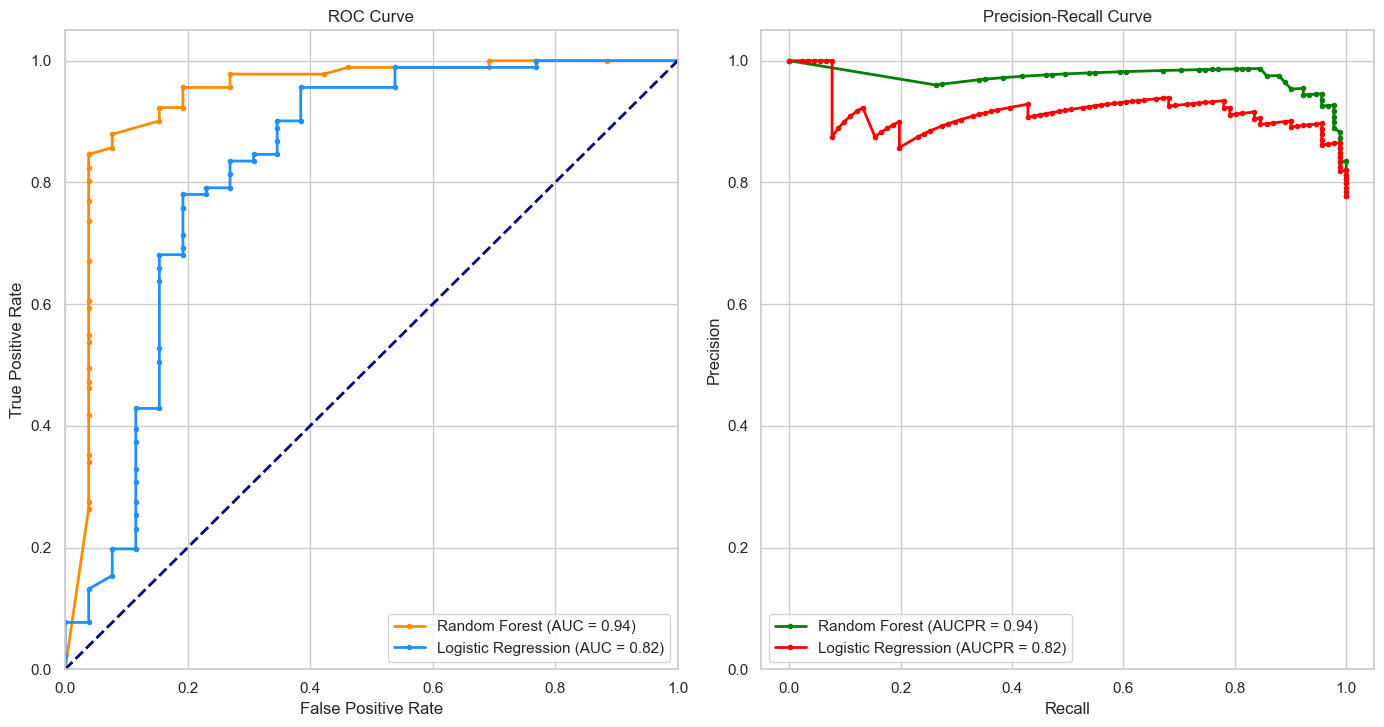

In [859]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 14))

# Plot ROC curves
plt.subplot(2, 2, 1)
plt.plot(fpr_rf, tpr_rf, marker='.', color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr, tpr, marker='.', color="dodgerblue", lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curves
plt.subplot(2, 2, 2)
plt.plot(recall_rf, precision_rf, marker='.', color='green', lw=2, label='Random Forest (AUCPR = %0.2f)' % roc_auc_rf)
plt.plot(recall, precision, marker='.', color="red", lw=2, label='Logistic Regression (AUCPR = %0.2f)' % roc_auc)
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

The Random Forest model shows better positioning in both the ROC (closer to the upper-left corner) and PR curves (positioned higher) compared to Logistic Regression. This suggests that the Random Forest model outperforms Logistic Regression in terms of predictive performance. Overall, based on these curve analyses, the Random Forest model emerges as the more reliable choice for this specific classification task.

### 5.3. Test
To wrap up the model building and evaluation section, let's examine the actual prediction outcomes of the two models using two samples from the test set. Sample number 339 has a label of 0, while sample number 230 has a label of 1.

In [847]:
# Sample No. 339:0
logistic_model.predict_proba(X.iloc[[339], :])

array([[0.57391837, 0.42608163]])

In [848]:
random_forest_model.predict_proba(X.iloc[[339], :])

array([[0.97, 0.03]])

The Random Forest model produces a nearly perfect prediction result of 0.97 for label 0. In contrast, the Logistic Regression model yields ambiguous results between the two classes, with a probability of 0.57 for class 0 and 0.42 for class 1. This discrepancy highlights the influence of class imbalance on label prediction by the Logistic Regression model, whereas the Random Forest model adeptly manages this issue.

In [849]:
#Sample No. 230: 1
logistic_model.predict_proba(X.iloc[[230], :])

array([[0.11222237, 0.88777763]])

In [850]:
random_forest_model.predict_proba(X.iloc[[230], :])

array([[0.07, 0.93]])

The Random Forest model maintains its strong performance, achieving a 0.93 probability of correctly identifying label 1. In contrast, the Logistic Regression model demonstrates a probability of 0.11 for identifying label 0 and 0.88 for label 1.

# C. Conclusion
In this project, we delved into the realm of data analysis within the context of online food ordering, aiming to gain valuable insights into customer behavior and inform strategic decision-making for businesses in the Food & Beverage sector. Through visualizations and statistical summaries, we gained insights into various demographic factors such as age, gender, marital status, and educational qualifications, shedding light on the characteristics of our customer base. Younger customers, particularly those in the Post Graduate category, exhibited higher rates of satisfaction and reordering, while older demographics were more inclined to discontinue their use of the service.

Moving forward, our focus shifted to model training and evaluation. We employed machine learning algorithms such as Logistic Regression and Random Forest to predict customer behavior and feedback sentiment. While both models showed promise, with Random Forest outperforming Logistic Regression, we encountered challenges associated with class imbalance, impacting the performance of the models. The threshold tuning has also implemented and the tradeoff between precision and recall is also the the question for the businesses. 

Overall, this project highlights the invaluable role of data analysis in understanding customer behavior and driving business growth in the online ordering space. By leveraging data-driven insights, businesses can enhance customer satisfaction, optimize operational efficiency, and ultimately, thrive in an increasingly competitive market landscape.

In close, continued investment in data analytics and machine learning capabilities will be essential for businesses seeking to stay ahead of evolving consumer preferences and market trends, ultimately ensuring sustained success in the dynamic world of F&B.

P/S: If you've made it to this line, thank you for reading. This marks my very first project in data analysis/data science, and I look forward to your comments and insights.